<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_6/6_1_part3_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automation


---

Automation is a fundamental aspect of programming that enables developers to efficiently perform repetitive tasks by writing code to automate the process. In Python, functions and loops are two powerful tools that can be combined to create automated processes for data manipulation, analysis, and other tasks. By creating functions that perform specific operations on data and using loops to iterate through multiple datasets or sets of parameters, developers can automate complex tasks and reduce the time and effort required to perform them manually. In this way, automation with functions and loops can increase productivity, reduce errors, and make code more scalable and reusable. In the following examples, we will explore how to use functions and loops to automate data cleaning and analysis tasks in Python.



---


In this notebook we'll put together parts 1(loops) & 2(functions) to automate our analysis of the loans and faang datasets. 

1. functions to analyze FAANG data
  - a function to calculate mean years experince by company
  - a function to generate histograms of numeric variables 
2. functions to analyze LOAN data
  - profiling numeric variables 
  - profiling categorical variables by loan_status





In [1]:
# --------------------------------
import warnings
warnings.filterwarnings('ignore')
# --------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

%matplotlib inline

In [2]:
faang = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_6/data/faang_salary_over_200k.csv")
faang.head()


,years_experince,company_name,job_title,degree,predict_proba,predict_status,income_level
0,6.0,Facebook,Business Analyst,PHD,0.007324,0,< 200K
1,5.0,Facebook,Business Analyst,PHD,0.006483,0,< 200K
2,1.0,Amazon,Business Analyst,Other,0.404390,0,< 200K
3,5.0,Facebook,Full-Stack Developer,Other,0.395955,0,< 200K
4,5.0,Facebook,Full-Stack Developer,Other,0.395955,0,< 200K


In [3]:
loans = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_6/data/loans_updated.csv")
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,Jan-15,171.62,NaN,Sep-16,744.0,740.0,0.0,NaN,1.0,INDIVIDUAL
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,NaN,Sep-16,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,Jun-14,649.91,NaN,Sep-16,719.0,715.0,0.0,NaN,1.0,INDIVIDUAL
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,Jan-15,357.48,NaN,Apr-16,604.0,600.0,0.0,NaN,1.0,INDIVIDUAL
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,Sep-16,67.79,Oct-16,Sep-16,694.0,690.0,0.0,NaN,1.0,INDIVIDUAL


# 1. Functions to analyze FAANG data


---

## RECIPE:
All analytics is a recipe! for automating analysis here's the basic recipe:

- get base code working
- wraper it in a function 
- parameterize the function 
- loop over columns 
- improve


1. mean years of experince 
  - get base code working
  - wrap in a function 
  - parameterize the function 
  - loop over columns 
2. histogram of numeric variables 
  - get base code working
  - wrap in a function 
  - parameterize the function 
  - loop over columns 


## 1. Mean years of experince 

Write a function to calculate the mean-years of experince by company

---



In [5]:
company = "Apple"
# - get base code working
company_mean = (faang
 .query('company_name == @company')[["years_experince"]]
 .mean()
 .round(3)
).values[0]

company_mean

14.352

In [6]:
# - wrap it in a function
def company_means():
  """ -- doc strings -- """
  company = "Apple"
  # - get base code working
  company_mean = (faang
    .query('company_name == @company')[["years_experince"]]
    .mean()
    .round(3)
    ).values[0]

  return company_mean


company_means()


14.352

In [9]:
# - parameterize the function
def company_means(company = "Amazon"):
  company_mean = (faang
  .query('company_name == @company')[["years_experince"]]
  .mean()
  .round(3)
  ).values[0]
  return company_mean

print("Amazon  : {0} ".format(company_means("Amazon")))
print("Apple   : {0} ".format(company_means("Apple")))
print("Netflix : {0} ".format(company_means("Netflix")))

Amazon  : 8.439 
Apple   : 14.352 
Netflix : 13.455 


In [12]:
listocompany = faang["company_name"].unique().tolist()

for company in listocompany:
  print(company)


Facebook
Amazon
Netflix
Apple
Google


In [14]:
# - loop over values 
companies = faang["company_name"].unique().tolist()
for company in companies:
  print("{}\t- average years expeince:\t{:.2f} ".format(company, company_means(company)))


Facebook	- average years expeince:	6.58 
Amazon	- average years expeince:	8.44 
Netflix	- average years expeince:	13.46 
Apple	- average years expeince:	14.35 
Google	- average years expeince:	6.96 


## 2. Histograms of numeric variables

Make function that creates a histogram numeric variables
---

- get base code working
- wrap in a function
- parameterize the function
- loop over columns
- improve


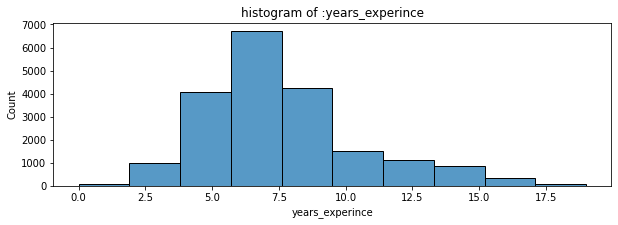

In [15]:
# - get base code working
plt.figure(figsize=(10,3))
sns.histplot(data=faang, x="years_experince", bins=10)
plt.title("histogram of :{}".format("years_experince"))
plt.show()

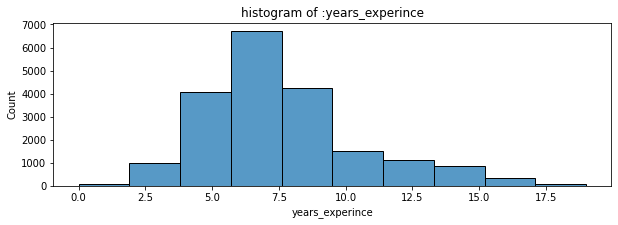

In [16]:
# - wrapper it in a function 
def hist_plot():
  plt.figure(figsize=(10,3))
  sns.histplot(data=faang, x="years_experince", bins=10)
  plt.title("histogram of :{}".format("years_experince"))
  plt.show()

hist_plot()

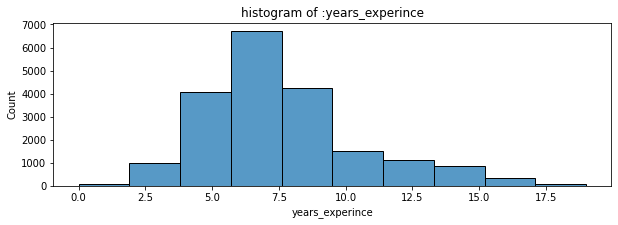

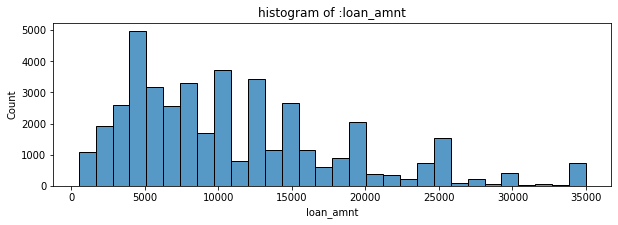

In [18]:
# - parameterize it
def hist_plot(df,column,bins):
  plt.figure(figsize=(10,3))
  sns.histplot(data=df, 
               x=column, 
               bins=bins)
  plt.title("histogram of :{}".format(column))
  plt.show()

hist_plot(faang,"years_experince",10)
hist_plot(loans,"loan_amnt",30)

In [20]:
faang.select_dtypes(include="number").columns

Index(['years_experince', 'predict_proba', 'predict_status'], dtype='object')

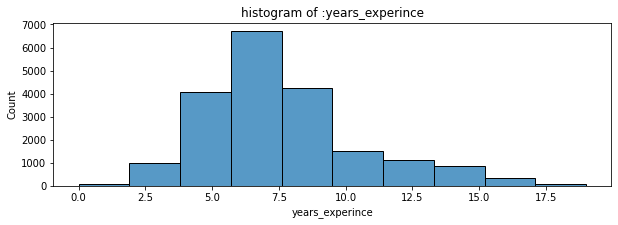

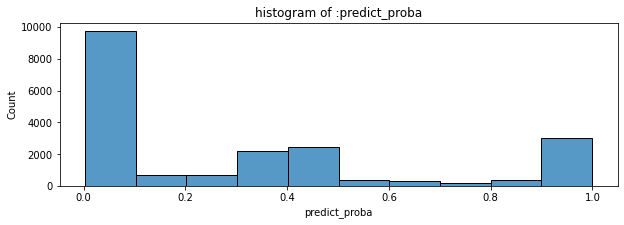

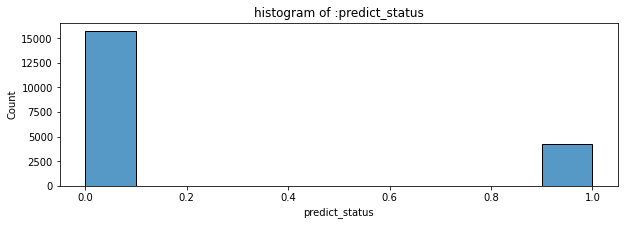

In [21]:
# make a loop 
numeric_cols = faang.select_dtypes(include="number").columns

for col in numeric_cols:
  hist_plot(faang,col,10)


# 2. Functions to analyze LOAN data


---

Suppose you want to automate the profiling of numeric and categorical variables. specifically you want a table of metrics and a graph. Doing this once isn't a big deal doing this a hundred times - this is where we want to follow our automation recipe. 

Here is what we want for our analysis:

1. profile of numeric variables 
  - for each numeric variable 
    - create a table of mean, min, max
    - create a histogram using sturge's rule 
    - output a figure with the table and the plot. 
    
2. profile categorical varibles 
  - for each object / category varible 
    - output a table of counts, unqiue, % unique
    - ouptut a count plot of top 10 categories  

## 1. Profile of numeric variables 
  - for each numeric variable 
    - create a table of mean, min, max
    - create a histogram using sturge's rule 
    - output a figure with the table and the plot.

In [22]:
# get base code working
column = "loan_amnt"
res = (loans
       .agg({column:["count","nunique","min","max","mean"]})
       .round(3)
       .reset_index()
       .rename(columns={"index":"measure"})
)
print(res)



   measure  loan_amnt
0    count  42535.000
1  nunique    898.000
2      min    500.000
3      max  35000.000
4     mean  11089.723


16


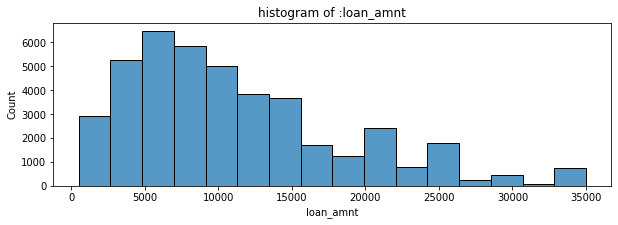

In [23]:

# Calculate the number of bins using Sturge's rule
num_bins = int(1 + np.log2(loans.shape[0]))
print(num_bins)
# - get base code working
plt.figure(figsize=(10,3))
sns.histplot(data=loans, x=column, bins=num_bins)
plt.title("histogram of :{}".format(column))
plt.show()

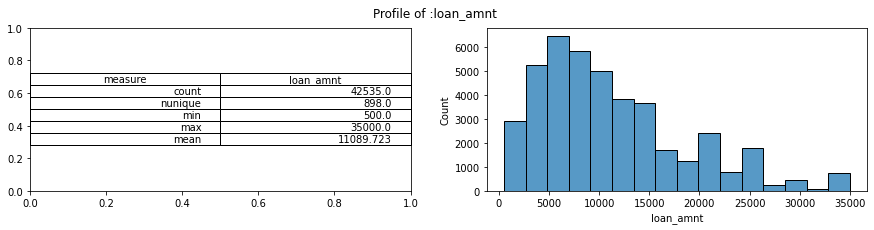

In [24]:
# -- get base code working 
# Create a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 3));

# make a table object
table = axs[0].table(cellText=res.values, colLabels=res.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

# - get base code working
sns.histplot(data=loans, 
             x=column, 
             bins=num_bins,
             ax=axs[1])
# Add a title to the plot
fig.suptitle('Profile of :{}'.format(column));
plt.show()



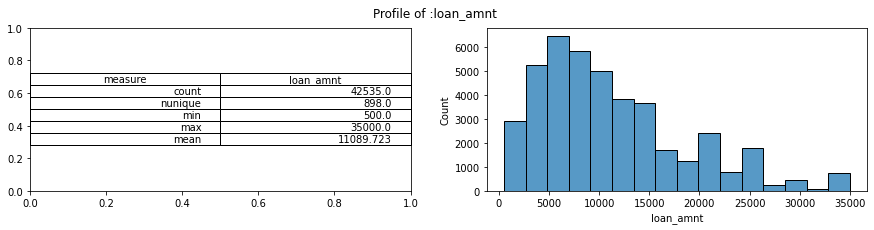

0

In [25]:
# -- wraper it in a function 
def create_var_profile():
  # get base code working
  column = "loan_amnt"
  res = (loans
        .agg({column:["count","nunique","min","max","mean"]})
        .round(3)
        .reset_index()
        .rename(columns={"index":"measure"})
  )
  # Calculate the number of bins using Sturge's rule
  num_bins = int(1 + np.log2(loans.shape[0]))
  # Create a grid of subplots with 1 row and 2 columns
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 3));

  # make a table object
  table = axs[0].table(cellText=res.values, colLabels=res.columns, loc='center')
  table.auto_set_font_size(False)
  table.set_fontsize(10)

  # - get base code working
  sns.histplot(data=loans, 
              x=column, 
              bins=num_bins,
              ax=axs[1])
  # Add a title to the plot
  fig.suptitle('Profile of :{}'.format(column));
  plt.show()
  # return something 
  return 0

create_var_profile()

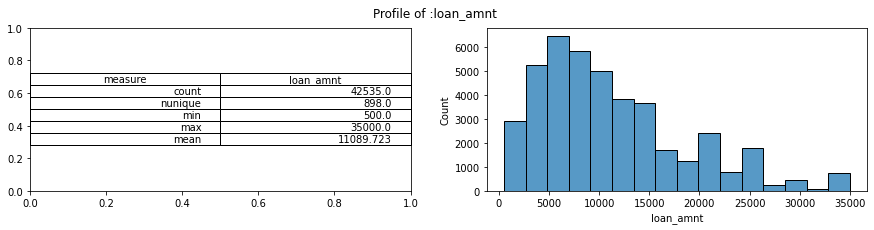

0

In [26]:
# -- parameterize it
# -- wraper it in a function 
def create_var_profile(column):
  # get base code working
  
  res = (loans
        .agg({column:["count","nunique","min","max","mean"]})
        .round(3)
        .reset_index()
        .rename(columns={"index":"measure"})
  )
  # Calculate the number of bins using Sturge's rule
  num_bins = int(1 + np.log2(loans.shape[0]))
  # Create a grid of subplots with 1 row and 2 columns
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 3));

  # make a table object
  table = axs[0].table(cellText=res.values, colLabels=res.columns, loc='center')
  table.auto_set_font_size(False)
  table.set_fontsize(10)

  # - get base code working
  sns.histplot(data=loans, 
              x=column, 
              #hue="loan_status",
              bins=num_bins,
              ax=axs[1])
  # Add a title to the plot
  fig.suptitle('Profile of :{}'.format(column));
  plt.show()
  # return something 
  return 0

create_var_profile("loan_amnt")

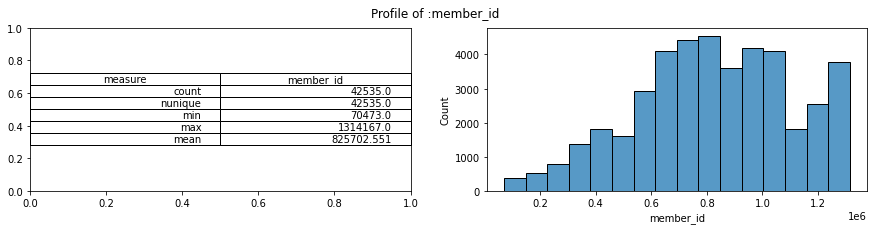

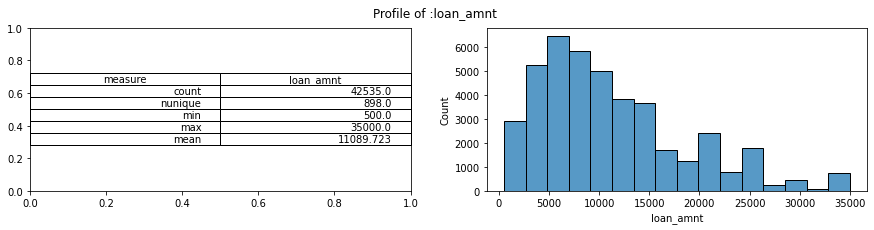

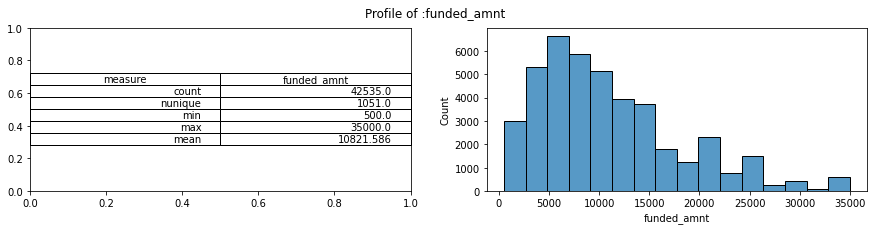

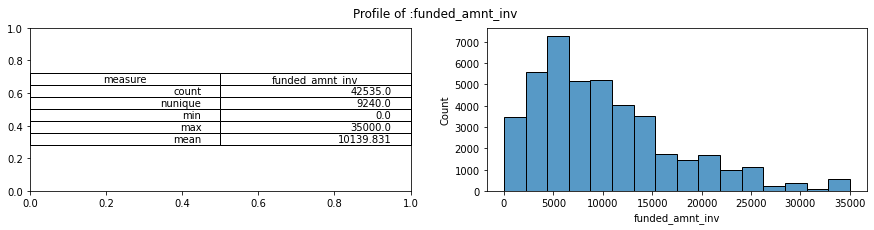

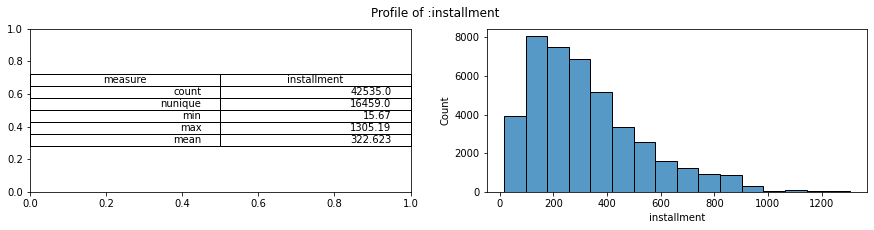

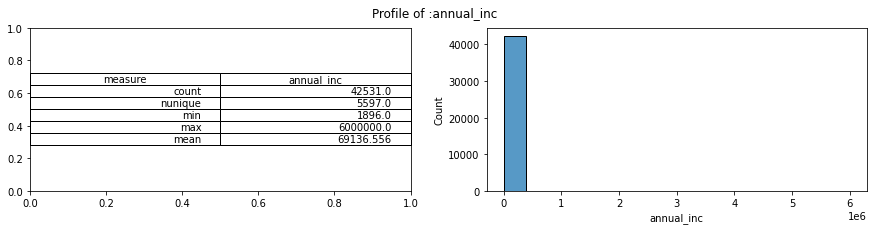

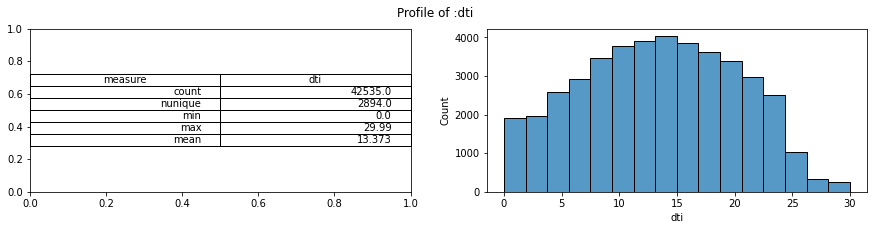

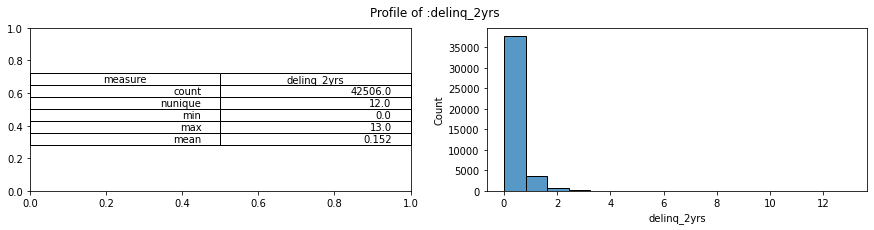

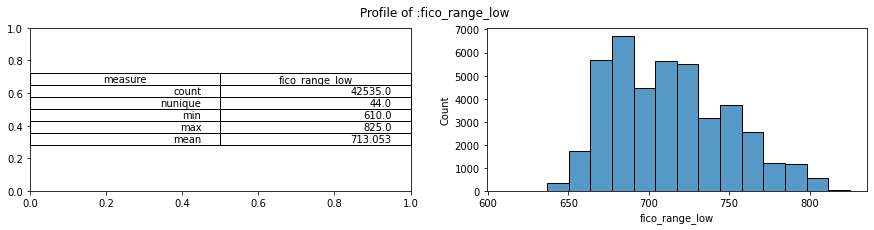

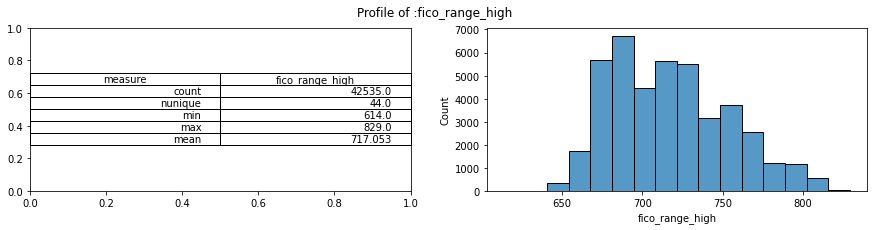

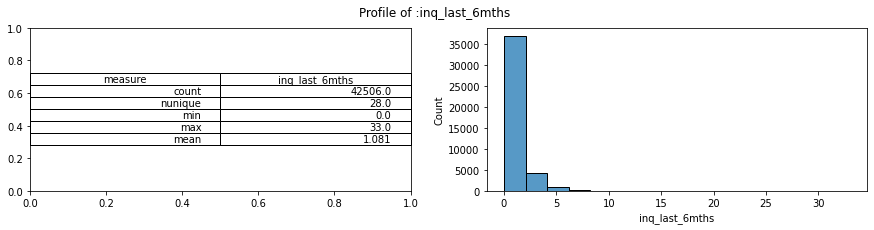

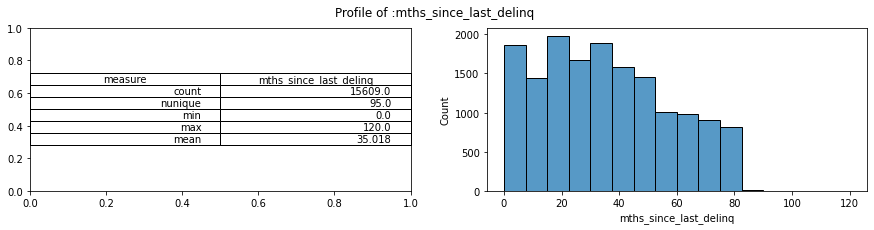

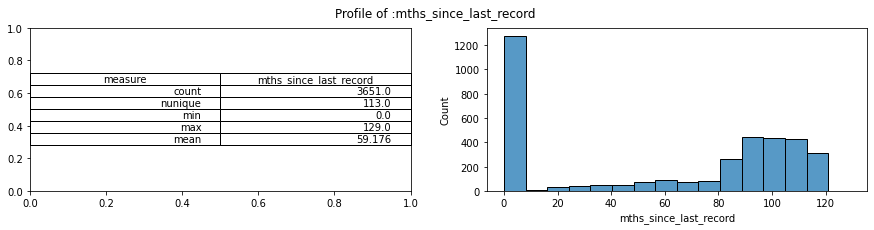

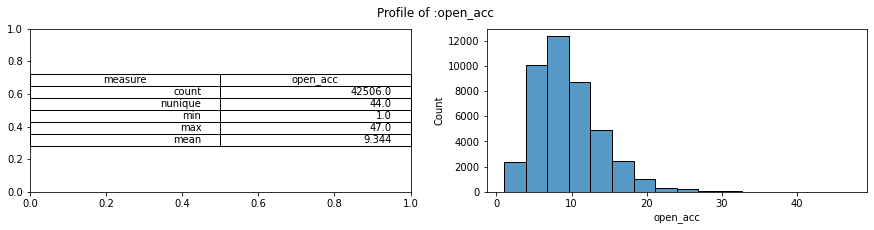

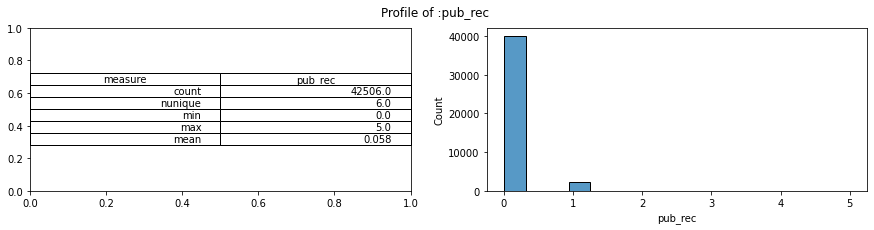

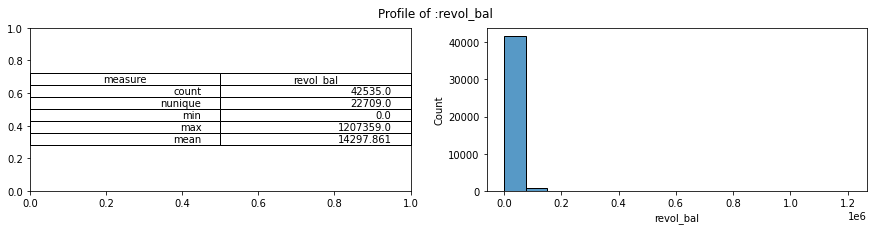

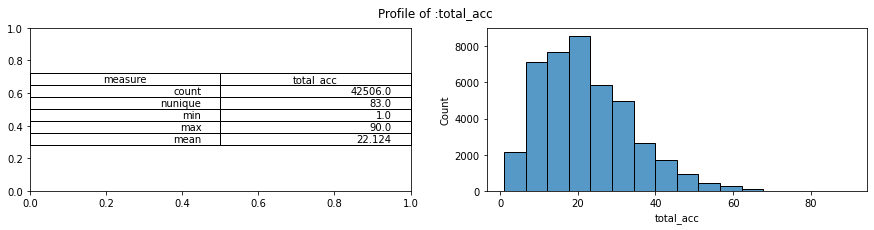

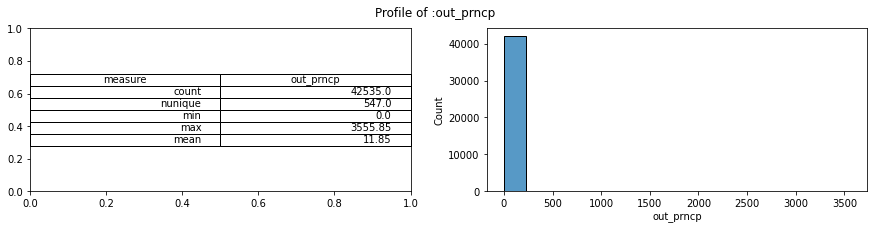

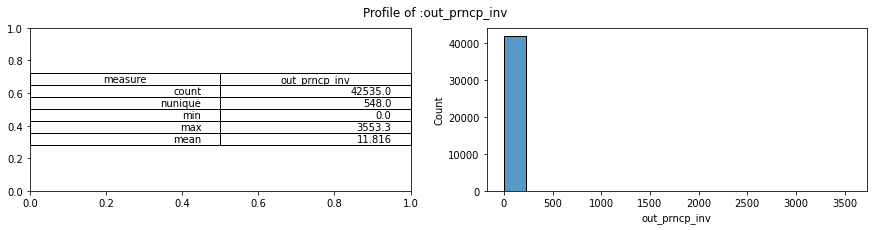

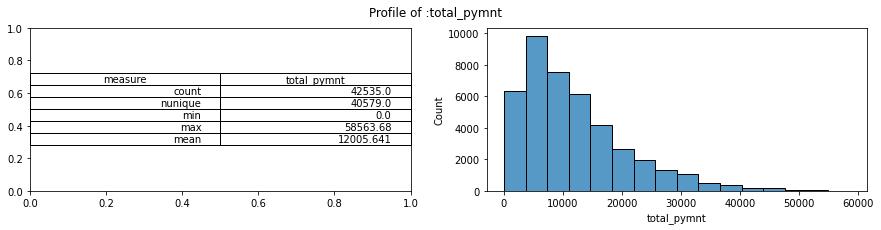

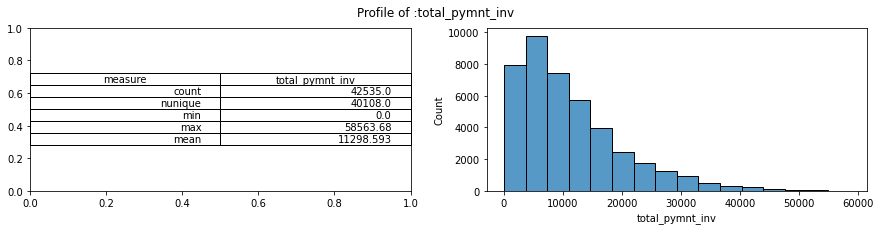

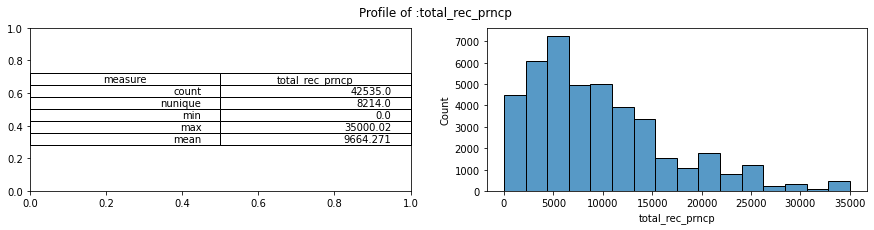

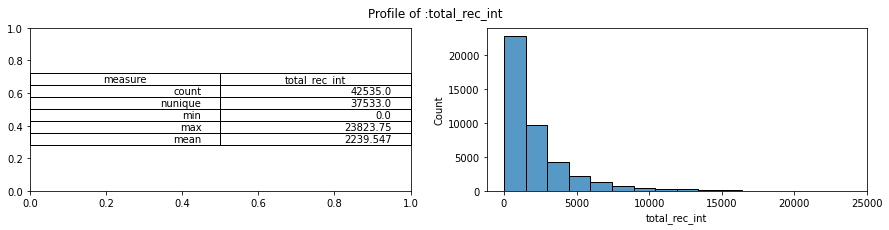

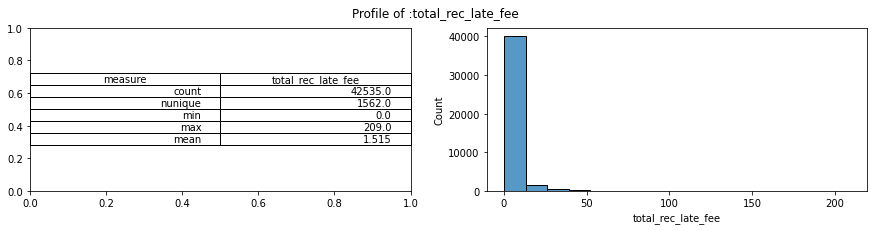

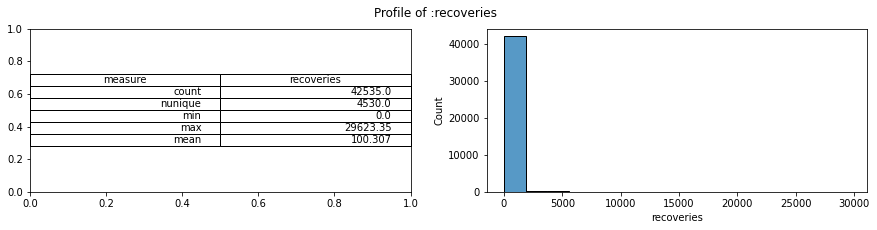

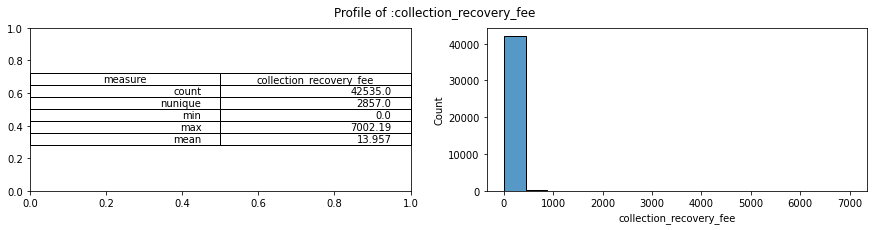

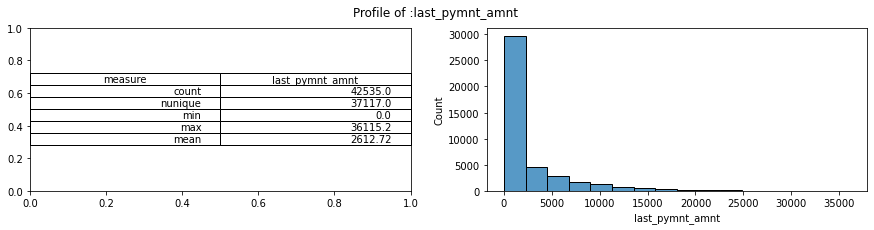

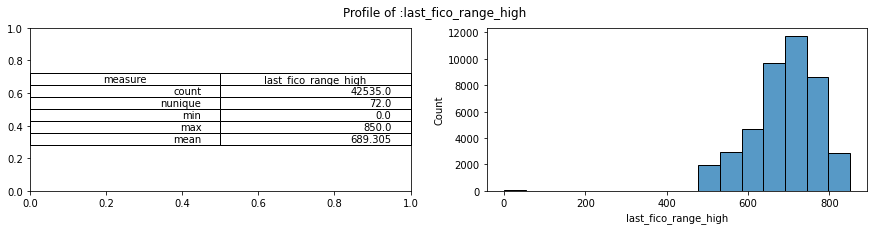

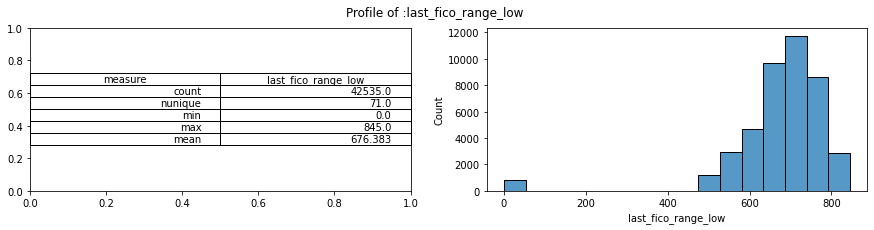

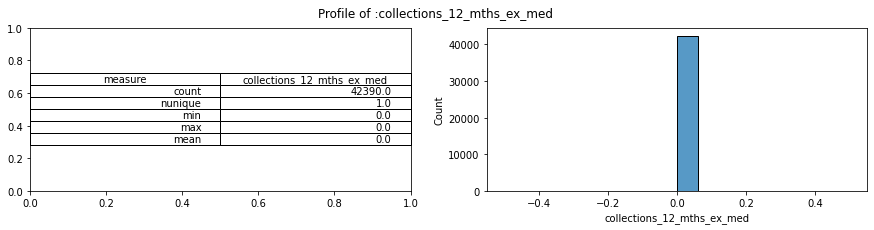

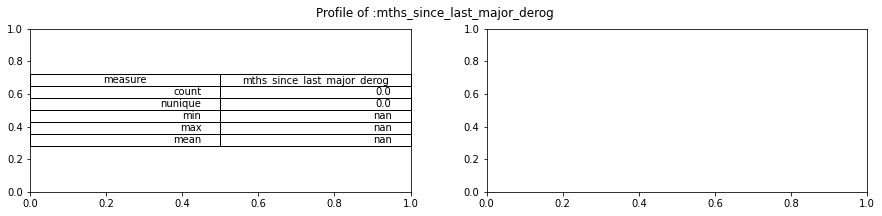

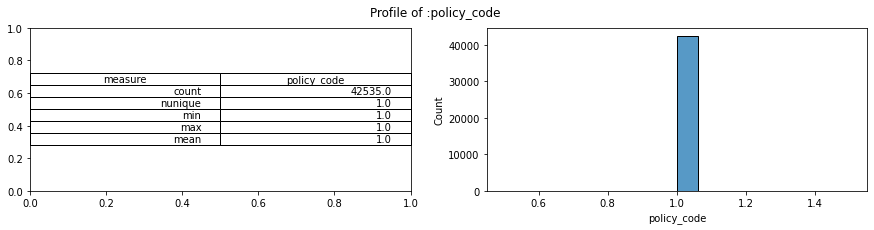

In [27]:
# -- loop stuff! 
numeric_cols = loans.select_dtypes(include="number").columns

for col in numeric_cols:
  create_var_profile(col)

## 2. Profile categorical varibles for "Charged Off","Fully Paid"
  - for each  object / category column count levels by loan status "Charged Off","Fully Paid"
    - create a table of the variable the a count and number of unique values
    - create a count plot of top 10 categories 
    - output a figure with the table and the plot.

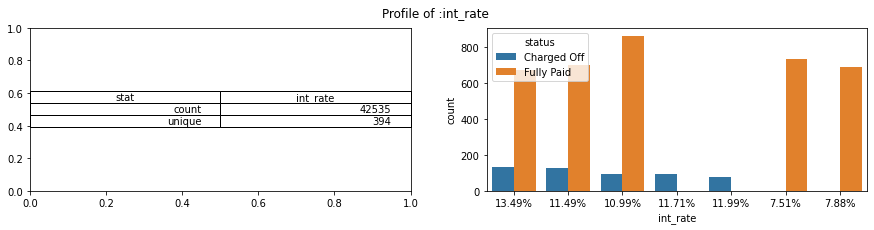

In [28]:
column = "int_rate"
t1 = (pd.DataFrame(loans[column].describe())
  .reset_index()
  .rename(columns={"index":"stat"})
  .query("stat == ['count','unique']")
)


# table of counts
res = (loans
       .query('loan_status == ["Charged Off","Fully Paid"]')
       .groupby([column,"loan_status"])
       .agg({"id":["count"]})
       .reset_index()
)
# rename columns
res.columns = [column,"loan_status", "count"]

# Get the top 10 rows by group
top_10_by_group = (res
                   .groupby('loan_status')
                   .apply(lambda x: x.nlargest(5, 'count'))
)
# rename columns
top_10_by_group.columns = [column,"status","count"]
# reset index 
res2 = top_10_by_group.reset_index()


# -- get make the plot -- 
# Create a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 3));

# make a table object
table = axs[0].table(cellText=t1.values, colLabels=t1.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

# - get base code working
sns.barplot(data=res2, 
             x=column, 
            y="count", hue="status",
             ax=axs[1])
# Add a title to the plot
fig.suptitle('Profile of :{}'.format(column));
plt.show()


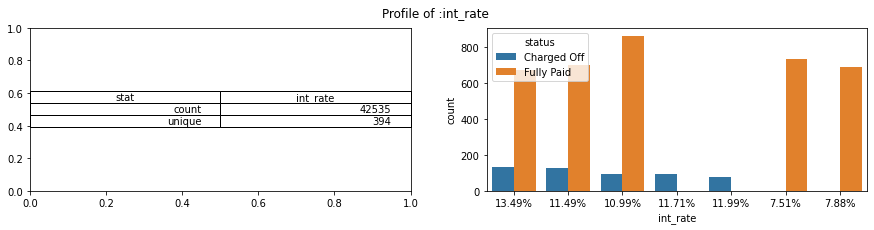

In [29]:
# wrap in a function 
def cat_profile():
  column = "int_rate"
  t1 = (pd.DataFrame(loans[column].describe())
    .reset_index()
    .rename(columns={"index":"stat"})
    .query("stat == ['count','unique']")
  )


  # table of counts
  res = (loans
        .query('loan_status == ["Charged Off","Fully Paid"]')
        .groupby([column,"loan_status"])
        .agg({"id":["count"]})
        .reset_index()
  )
  # rename columns
  res.columns = [column,"loan_status", "count"]

  # Get the top 10 rows by group
  top_10_by_group = (res
                    .groupby('loan_status')
                    .apply(lambda x: x.nlargest(5, 'count'))
  )
  # rename columns
  top_10_by_group.columns = [column,"status","count"]
  # reset index 
  res2 = top_10_by_group.reset_index()


  # -- get make the plot -- 
  # Create a grid of subplots with 1 row and 2 columns
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 3));

  # make a table object
  table = axs[0].table(cellText=t1.values, colLabels=t1.columns, loc='center')
  table.auto_set_font_size(False)
  table.set_fontsize(10)

  # - get base code working
  sns.barplot(data=res2, 
              x=column, 
              y="count", hue="status",
              ax=axs[1])
  # Add a title to the plot
  fig.suptitle('Profile of :{}'.format(column));
  plt.show()

cat_profile()

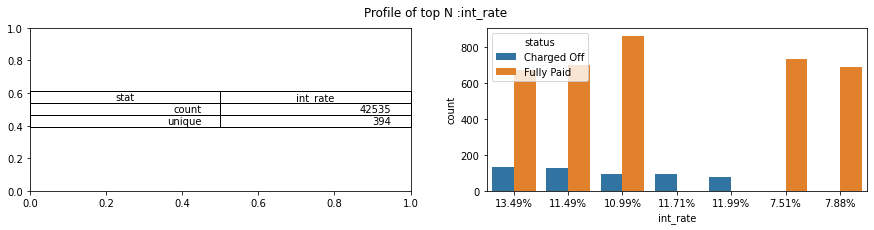

In [30]:
# parameterize function

def cat_profile(column):
  
  t1 = (pd.DataFrame(loans[column].describe())
    .reset_index()
    .rename(columns={"index":"stat"})
    .query("stat == ['count','unique']")
  )


  # table of counts
  res = (loans
        .query('loan_status == ["Charged Off","Fully Paid"]')
        .groupby([column,"loan_status"])
        .agg({"id":["count"]})
        .reset_index()
  )
  # rename columns
  res.columns = [column,"loan_status", "count"]

  # Get the top 10 rows by group
  top_10_by_group = (res
                    .groupby('loan_status')
                    .apply(lambda x: x.nlargest(5, 'count'))
  )
  # rename columns
  top_10_by_group.columns = [column,"status","count"]
  # reset index 
  res2 = top_10_by_group.reset_index()


  # -- get make the plot -- 
  # Create a grid of subplots with 1 row and 2 columns
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 3));

  # make a table object
  table = axs[0].table(cellText=t1.values, colLabels=t1.columns, loc='center')
  table.auto_set_font_size(False)
  table.set_fontsize(10)

  # - get base code working
  sns.barplot(data=res2, 
              x=column, 
              y="count", hue="status",
              ax=axs[1])
  # Add a title to the plot
  fig.suptitle('Profile of top N :{}'.format(column));
  plt.show()


column = "int_rate"
cat_profile(column)


Index(['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')


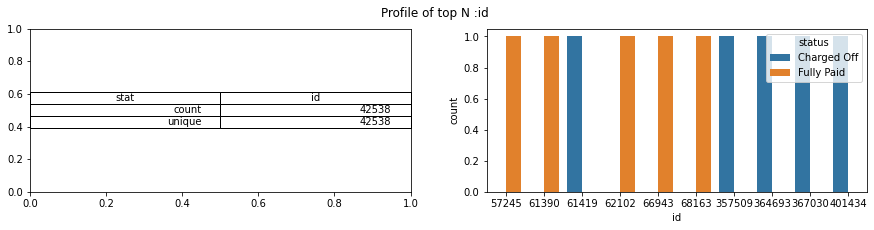

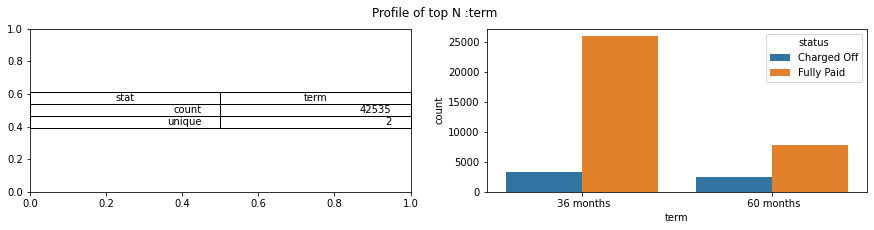

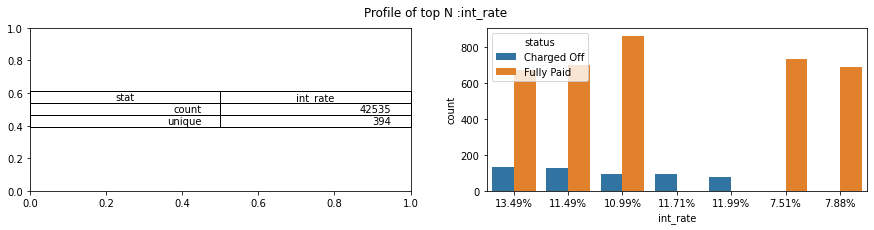

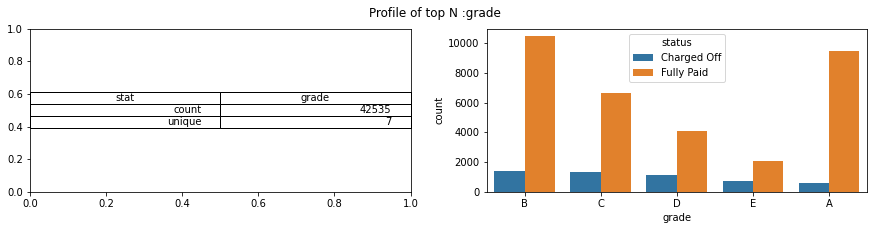

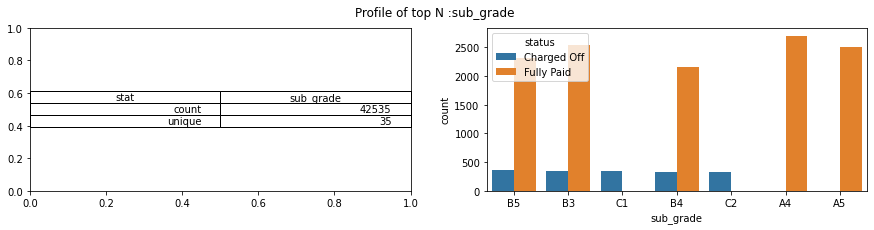

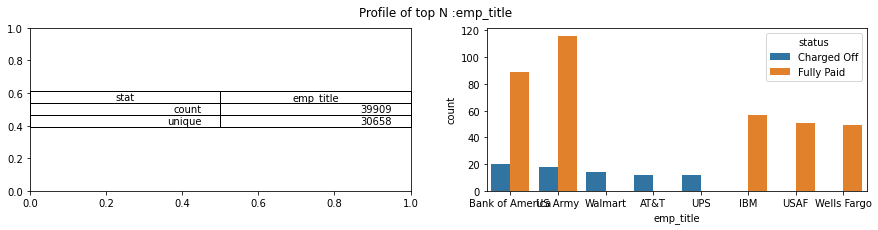

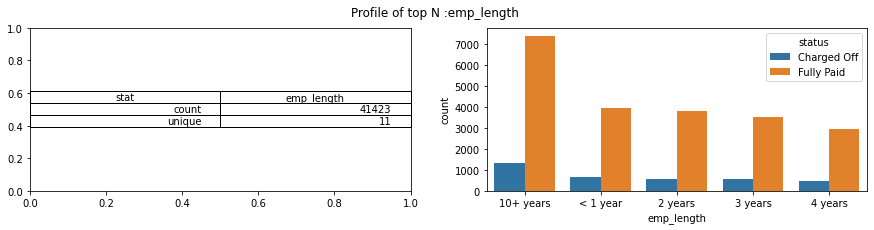

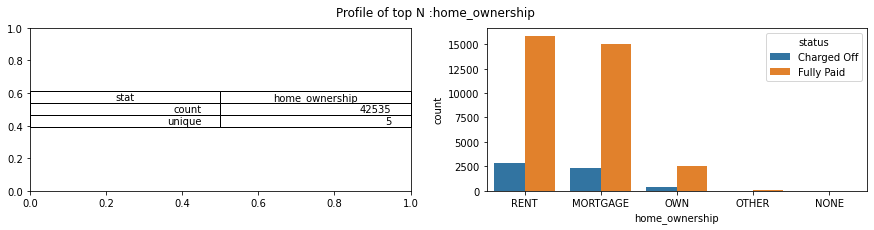

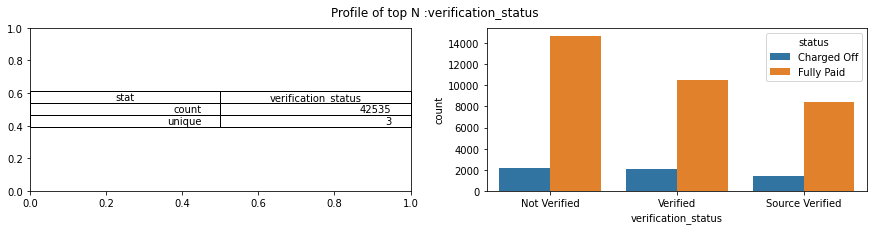

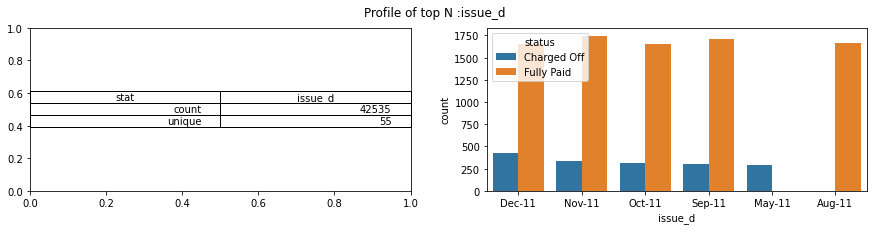

ValueError: ignored

In [31]:
# Loop
cat_cols = loans.select_dtypes(include="object").columns
cat_cols
print(cat_cols)

for column in cat_cols:
  cat_profile(column)


['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'application_type']


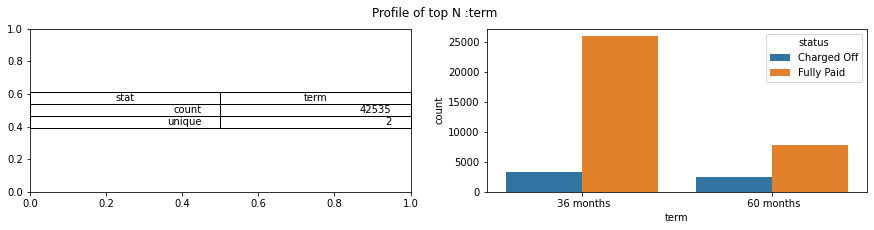

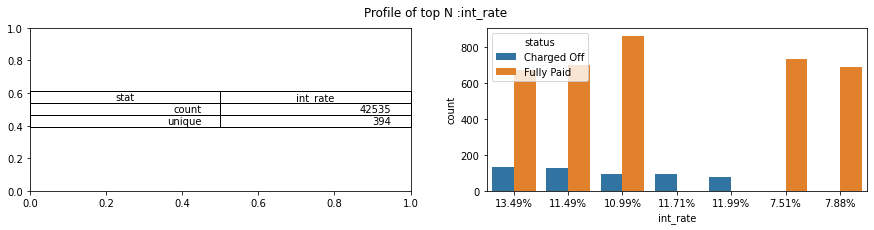

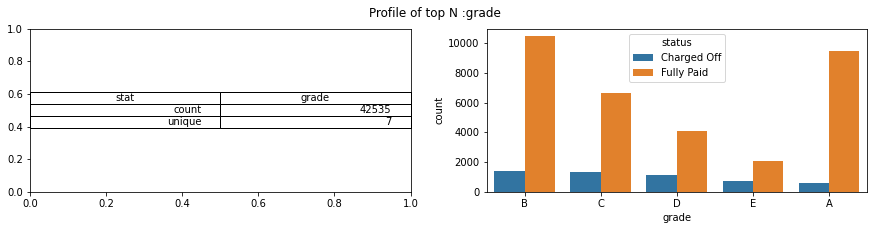

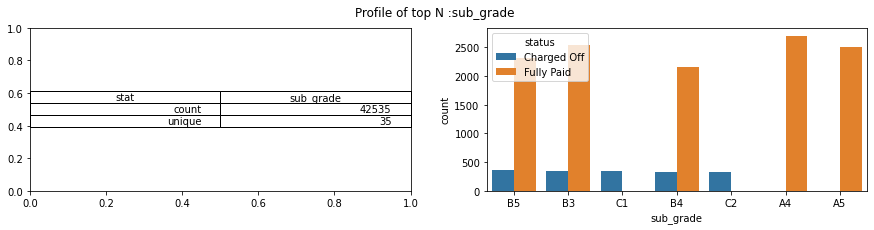

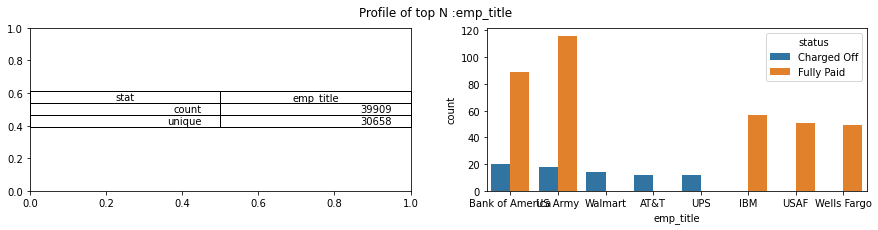

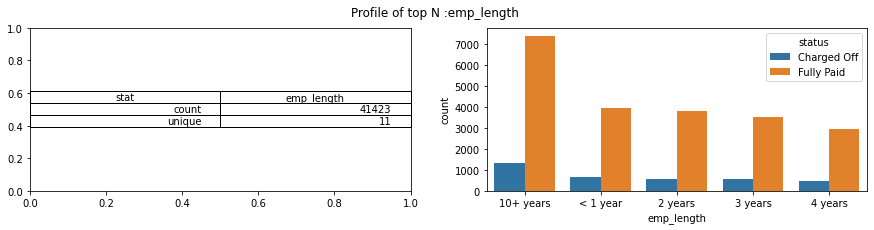

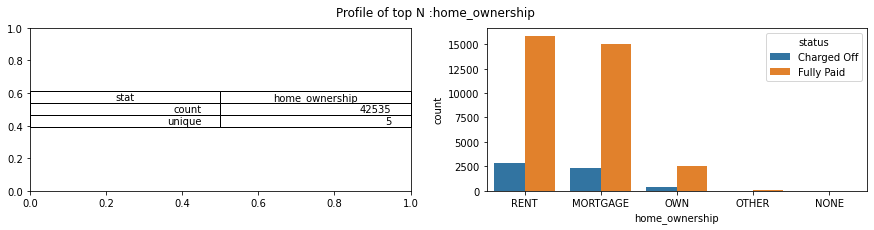

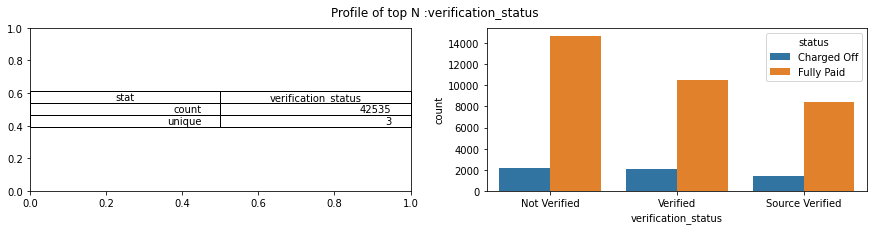

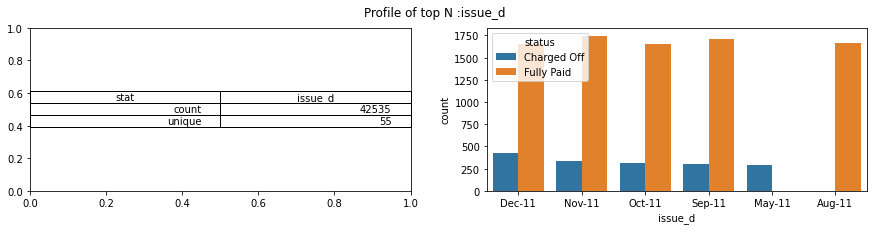

skip


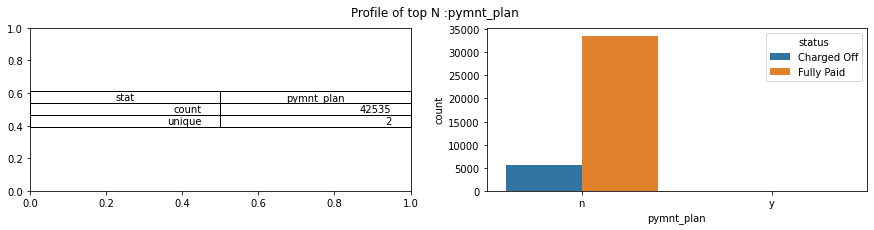

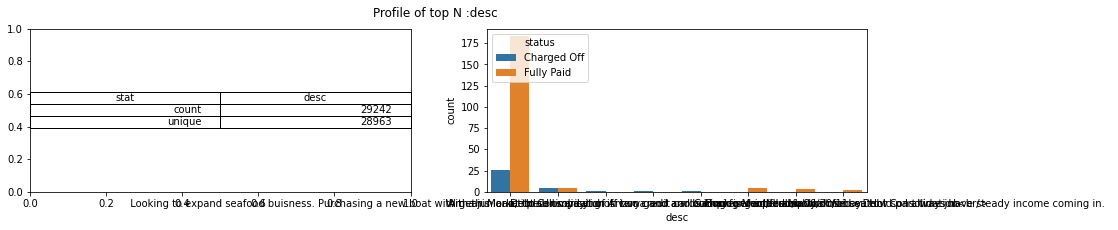

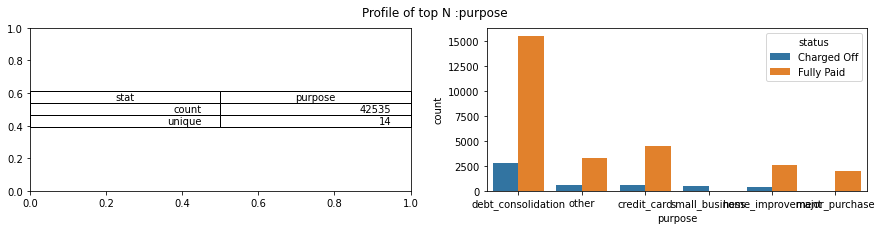

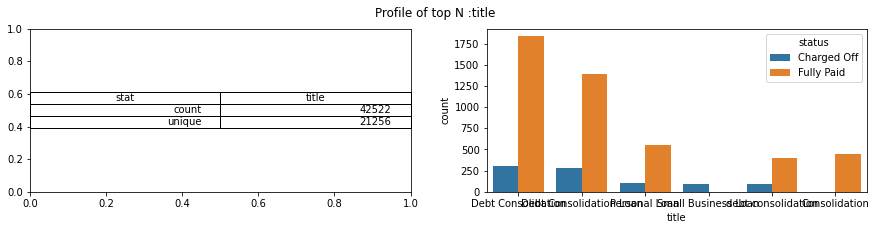

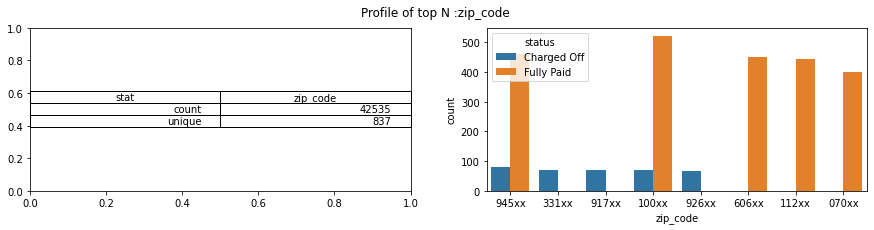

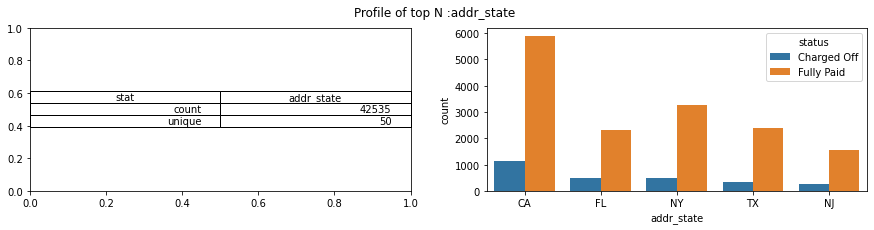

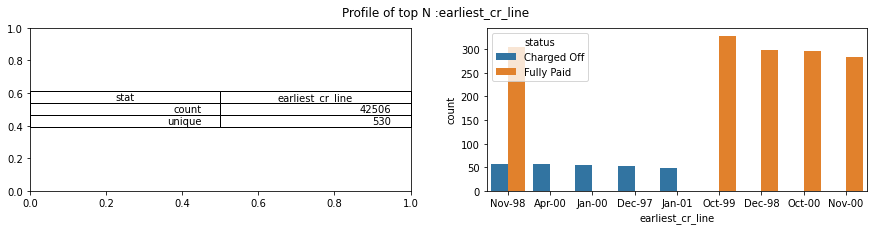

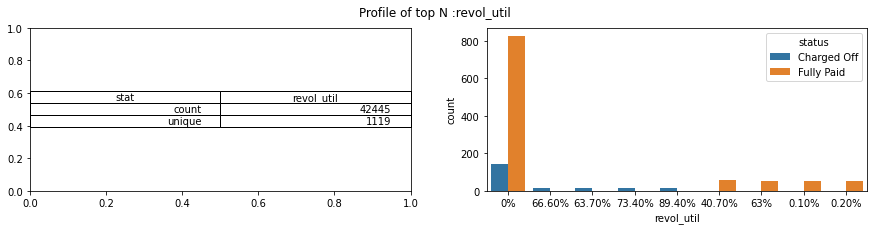

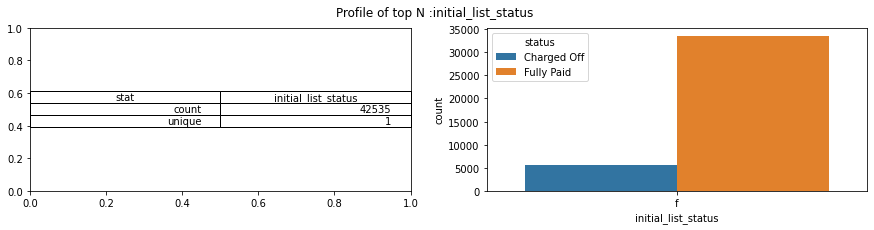

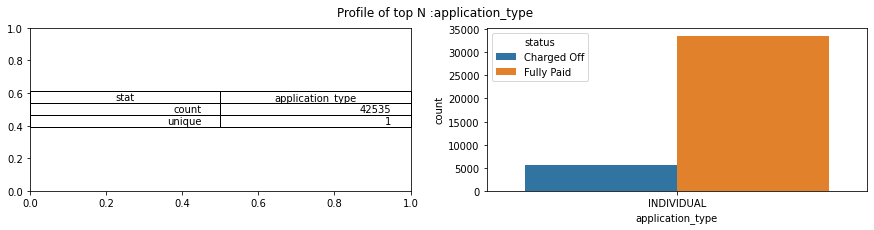

In [32]:
# improve
# parameterize function

def cat_profile(column):

  if column == "loan_status":
    print("skip")
  else:
    t1 = (pd.DataFrame(loans[column].describe())
      .reset_index()
      .rename(columns={"index":"stat"})
      .query("stat == ['count','unique']")
    )

    # table of counts
    res = (loans
          .query('loan_status == ["Charged Off","Fully Paid"]')
          .groupby([column,"loan_status"])
          .agg({"id":["count"]})
          .reset_index()
    )
    # rename columns
    res.columns = [column,"loan_status", "count"]

    # Get the top 10 rows by group
    top_10_by_group = (res
                      .groupby('loan_status')
                      .apply(lambda x: x.nlargest(5, 'count'))
    )
    # rename columns
    top_10_by_group.columns = [column,"status","count"]
    # reset index 
    res2 = top_10_by_group.reset_index()


    # -- get make the plot -- 
    # Create a grid of subplots with 1 row and 2 columns
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 3));

    # make a table object
    table = axs[0].table(cellText=t1.values, colLabels=t1.columns, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)

    # - get base code working
    sns.barplot(data=res2, 
                x=column, 
                y="count", hue="status",
                ax=axs[1])
    # Add a title to the plot
    fig.suptitle('Profile of top N :{}'.format(column));
    plt.show()

# -- exclude 
exclude_list = ["id",'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

# Loop
cat_cols = loans.select_dtypes(include="object").columns.tolist()

cat_columns = [x for x in cat_cols if x not in exclude_list]

print(cat_columns)

for column in cat_columns:
  cat_profile(column)
